# Introduction to Data Science – Project Proposals
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, March 7 2025, 11:59pm.

In this project report we will mention basic information about the members, background and motivation for choosing the direction of the project, setting the project objectives, asking the main questions and setting learning objectives, performing data description and acquisition, ethical considerations and potential harms of the direction, performing data cleaning and processing then exploratory analysis including the analytical methods used, and finally developing a timeline for the group project.


# Project Title: Microeconomic Analysis of Wheat Pricing and Market Behavior in Utah: Exploring Local Agricultural Trends

## Team Members:
NAME(EMAIL, UID)
- **YUYANG YAO** (<u1400651@umail.utah.edu>, u1400651)
- **NICLAS SCOTT HOLMAN** (<u1281501@umail.utah.edu>, u1281501)
- **WEITONG NIU** (<u1345736@umail.utah.edu>, u1345736)

## Background and Motivation

The motivation for this project arises from the ongoing importance of wheat as a staple agricultural commodity, particularly in local markets such as Kansas. Wheat pricing is influenced by numerous factors including production levels, supply chain issues, weather, export-import dynamics, and local consumption patterns. As wheat prodcution plays a crucial role in Kansas state' local crop economies, understanding the microeconomic factors behind its pricing and market behavior is critical for optimizing and efficient decision-making by local farmers, policymakers, and businesses like demand, supply, equilibrium  price adn quantity trend forecast. 

Our team are interested in understanding how local factors, such as environmental and weather conditions, Market Structure (wheat should ), production efficiency (technology ex), and trade policies (tariffs and tax ex), affect wheat prices in Kansas (we may only focus on a few of them). In recent years, fluctuations in agricultural commodity prices have led to significant economic consequences for both producers and consumers in the region. By exploring these local dynamics, we will stirve to provide valuable insights that could help mitigate risks associated with price volatility and optimize agricultural practices in the region. We are also inetrested in the seaonal trend of price of wheat.

Through this analysis, we hope to contribute to a broader understanding of the agricultural markets in kansas (ex test if the model fit more generally), which can potentially be applied to other regions with similar economic and agricultural structures. Furthermore, this study aligns with current trends in using microeconomic theory to analyze agricultural markets and predict future market behaviors, particularly in the context of policy changes or shifts in production patterns due to supply and demand shifts together with elasity and so on.

## Project Objectives

- **Primary Questions**:
  - How do local factors, such as production levels and stocks, weather factors including rainfall and temperature, **imports, and exports (needs to add)**, influence wheat prices in Kansas? How are these variables correlated?
  - What are the key determinants of wheat supply and demand in Kansas's wheat market? I.e. except for sales and production, what other factors matter to my model?
  - Can we identify significant trends in wheat pricing and market behavior based on historical data?
  - How do we interpolate or adjust annual production data to obtain monthly or seasonal production data to match prices (Most reports and data are annual)?
   - How to do the missing sales in 2024 or other data influence the trend in regression? How to fix it?

- **Learning Objectives**:
  - Develop expertise in applying microeconomic concepts, such as supply (supply shock) and demand estimation models, market equilibrium distributions (maybe parametric or nonparametric), and price elasticity, to an agricultural market context.
  - Gain experience in working with time series data :(optional: Brownian motion (BM) (need to decompose, helpful for price volatility as diffusion matrix), exponential smoothing, ARIMA, including understanding seasonal trends and their impact on pricing to provide the approximate distribution type for regression (hopefully linear) and visualization.
  - Understand the role of local market dynamics within broader national and global agricultural trade systems (especially Kansas, which has the highest wheat production in the United States).
  - Learn how to conduct data cleaning and preparation (including quarterly stock info, not montly), do exploratory analysis, and develop forecasting models using historical agricultural data.
  - more details in the analysis part

(**add: time series exmpales, explain why we need to use it later**)

## Data Description and Acquisition

- **Data Format**: The data will be in CSV format (tabular format), which includes data on wheat production (annually), consumption measured in sales, stocks, temperature, and rainfall... (exports, imports not ready yet).
- **Size**: The dataset (df_kansasdata_1) and other separate data consist of several columns of factors of price from the 2015-2024 or 2025 Jan. Each row has data on wheat sales, prices for the USA and Kansas state,  temperature, and rainfall, some geographical info, as well as possible missing values (annual yield and stock separately not combined yet).
- **Attributes**: The datasets (df_kansasdata_1) include the following key features combined from separate svc files:
  - There are three 'Year' and two 'Period' columns due to inconsistent time for sales, two weather attributes, and two price attributes
  - some features and geographical attributes of the data, including State (all Kansas), commodity (target crops) wheat, some units info like Data item column (price in IN $/BU)
  - Price_Kansas_monthly is the monthly average price from Kansas State, Price_usa_monthly is the national monthly price level
  -And other factors of price trend, including two other factors, rainfall (Rainfall_kansas) and average monthly temperature of Kansas state (Avg_Tem_k)
  - sales is: Wheat sales as a percentage of the sales year, indicating seasonal patterns.
  - annual production and stock separately
  - will add more data as factors for price trends, etc.
  
- **Source**: The price and most attributes data are publicly available from the USDA NASS (National Agricultural Statistics Service), Economic Research Service. We will download the data from the USDA NASS's Quick Stat (brief monthly) :  [https://quickstats.nass.usda.gov/#321D38A0-B848-3BF5-AA16-C8ABE7613D32]. Tem and rain data for Kansas: [https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/statewide/time-series/14/tavg/1/0/2015-2025]
  
  



Null Model (H₀): Assumes no effect of Quantity, Weather, or Policy on Price (only intercept).
Alternative Model (H₁): Includes Quantity, Weather, and Policy as predictors of Price.
Log-Likelihoods: We compute the log-likelihood of both models.
Likelihood Ratio Test (LRT): Compares the two models by calculating the test statistic and p-value, which helps assess the significance of the included variables.
If the p-value is low (typically < 0.05), you reject the null hypothesis, indicating that Quantity, Weather, and Policy significantly affect Price.

In [43]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Generate fake data
np.random.seed(0)
n = 1000
Q = np.random.uniform(50, 200, n)  # Quantity
W = np.random.uniform(10, 30, n)   # Weather
P = np.random.randint(0, 2, n)     # Policy (0 = No policy, 1 = Policy in place)
price = 5 + 0.2 * Q + 0.5 * W + 3 * P + np.random.normal(0, 10, n)  # Price with noise

# Create DataFrame
data = pd.DataFrame({'price': price, 'Q': Q, 'W': W, 'P': P})

# Linear regression model (with Q, W, P as predictors)
X = sm.add_constant(data[['Q', 'W', 'P']])  # Add intercept
model = sm.OLS(data['price'], X).fit()

# Get confidence intervals for the coefficients
conf_int = model.conf_int(alpha=0.05)  # 95% confidence intervals
print(conf_int)


              0         1
const  2.296483  7.848703
Q      0.183775  0.211017
W      0.406372  0.604877
P      1.299915  3.675508


In the example, theta refers to the regression coefficients (intercept and slopes) that represent the relationship between the independent variables (Quantity, Weather, Policy) and the dependent variable (Price)

In [45]:
from bs4 import BeautifulSoup
import urllib.request

import pandas as pd
import scipy as sc
import numpy as np
import urllib.request

import statsmodels.formula.api as sm

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

df_what_price_usa_recently=pd.read_csv('what_price_usa_recently.csv', encoding='utf-8')
df_what_price_usa_recently.rename(columns={"Value": "Price_usa_monthly"}, inplace=True)
print(df_what_price_usa_recently.info())
df_what_price_usa_recently.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Program            121 non-null    object 
 1   Year               121 non-null    int64  
 2   Period             121 non-null    object 
 3   Week Ending        0 non-null      float64
 4   Geo Level          121 non-null    object 
 5   State              121 non-null    object 
 6   State ANSI         0 non-null      float64
 7   Ag District        0 non-null      float64
 8   Ag District Code   0 non-null      float64
 9   County             0 non-null      float64
 10  County ANSI        0 non-null      float64
 11  Zip Code           0 non-null      float64
 12  Region             0 non-null      float64
 13  watershed_code     121 non-null    int64  
 14  Watershed          0 non-null      float64
 15  Commodity          121 non-null    object 
 16  Data Item          121 non

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Price_usa_monthly,CV (%)
0,SURVEY,2025,JAN,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,5.52,NaN
1,SURVEY,2024,APR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,5.90,NaN
2,SURVEY,2024,AUG,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,5.23,NaN
3,SURVEY,2024,DEC,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,5.49,NaN
4,SURVEY,2024,FEB,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,6.34,NaN


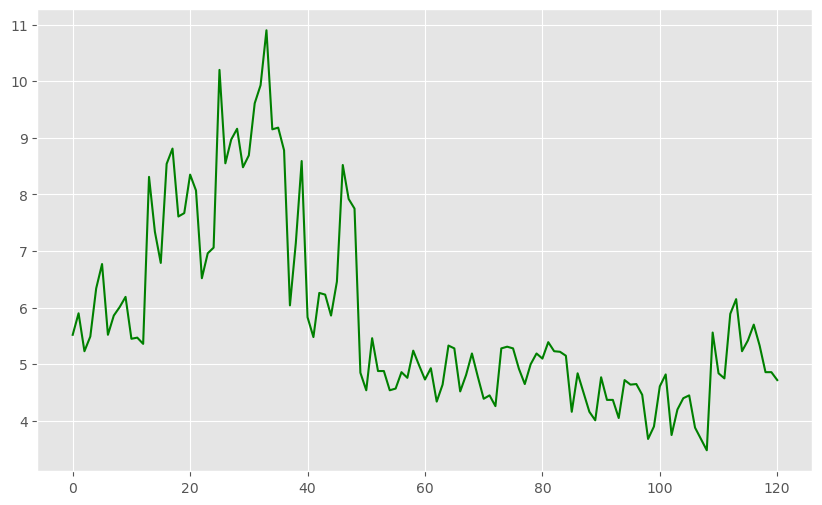

In [47]:

plt.plot(df_what_price_usa_recently.index, df_what_price_usa_recently["Price_usa_monthly"], color='green') # I didn't chnage x to be moth yet
plt.show()

In [49]:

df_wheat_price_kansas_1 = pd.read_csv('wheat price kansas.csv', encoding='utf-8')
df_wheat_price_kansas_1.rename(columns={"Value": "Price_Kansas_monthly"}, inplace=True)
print(df_wheat_price_kansas_1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Program               121 non-null    object 
 1   Year                  121 non-null    int64  
 2   Period                121 non-null    object 
 3   Week Ending           0 non-null      float64
 4   Geo Level             121 non-null    object 
 5   State                 121 non-null    object 
 6   State ANSI            121 non-null    int64  
 7   Ag District           0 non-null      float64
 8   Ag District Code      0 non-null      float64
 9   County                0 non-null      float64
 10  County ANSI           0 non-null      float64
 11  Zip Code              0 non-null      float64
 12  Region                0 non-null      float64
 13  watershed_code        121 non-null    int64  
 14  Watershed             0 non-null      float64
 15  Commodity             1

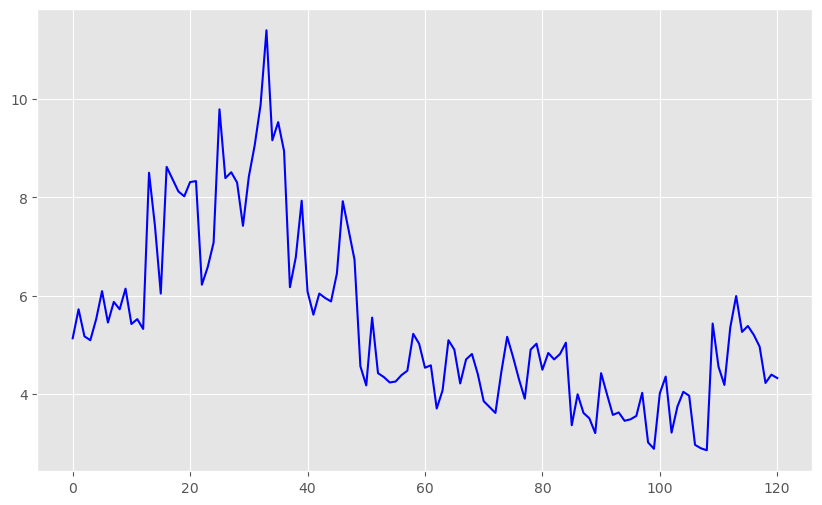

In [51]:

plt.plot(df_wheat_price_kansas_1.index, df_wheat_price_kansas_1["Price_Kansas_monthly"], color="blue")# I didn't chnage x to be moth yet
plt.show()# note that the two price patterns are similar due to Kansas's leading wheat production in the usa

In [53]:
df_rain_k=pd.read_csv('kansas_rainfall.csv', encoding='utf-8')
df_avg_temp_k=pd.read_csv('average tem Kansas.csv', encoding='utf-8')
df_climate_k=pd.concat([df_rain_k, df_avg_temp_k], axis=1)
df_climate_k=df_climate_k.iloc[3:,:]
df_climate_k.columns = ["Date", "Rainfall_Kansas", 'Date2',"Avg_Tem_k"]
df_climate_k=df_climate_k[["Date", "Rainfall_Kansas", "Avg_Tem_k"]]
df_climate_k.reset_index(inplace=True)
df_climate_k.drop("index", axis=1, inplace=True)

print(df_climate_k.info())
df_climate_k.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             121 non-null    object
 1   Rainfall_Kansas  121 non-null    object
 2   Avg_Tem_k        121 non-null    object
dtypes: object(3)
memory usage: 3.0+ KB
None


,Date,Rainfall_Kansas,Avg_Tem_k
0,201501,0.37,32.1
1,201502,0.83,31.2
2,201503,0.49,46.8
3,201504,2.76,56.4
4,201505,8.28,61.7


In [55]:
df_sales_k_1=pd.read_csv('wheat total sales Kansas.csv', encoding='utf-8') #Wheat sales as a percentage of the sales year,
#indicating seasonal patterns 
df_sales_k_1.rename(columns={"Value": "Sales_Kansas_monthly"}, inplace=True)
#print(df_sales_k_1.info())
df_sales_k_1.head()#issing vlaues


,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Sales_Kansas_monthly,CV (%)
0,SURVEY,2024,APR,NaN,STATE,KANSAS,20,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - SALES, MEASURED IN PCT OF MKTG YEAR",TOTAL,NOT SPECIFIED,6,NaN
1,SURVEY,2024,FEB,NaN,STATE,KANSAS,20,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - SALES, MEASURED IN PCT OF MKTG YEAR",TOTAL,NOT SPECIFIED,4,NaN
2,SURVEY,2024,JAN,NaN,STATE,KANSAS,20,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - SALES, MEASURED IN PCT OF MKTG YEAR",TOTAL,NOT SPECIFIED,4,NaN
3,SURVEY,2024,MAR,NaN,STATE,KANSAS,20,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - SALES, MEASURED IN PCT OF MKTG YEAR",TOTAL,NOT SPECIFIED,4,NaN
4,SURVEY,2024,MAY,NaN,STATE,KANSAS,20,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - SALES, MEASURED IN PCT OF MKTG YEAR",TOTAL,NOT SPECIFIED,6,NaN


In [59]:
df_kansasdata_1=pd.concat([df_wheat_price_kansas_1,df_what_price_usa_recently["Price_usa_monthly"]],axis=1)
df_kansasdata_1=pd.concat([df_kansasdata_1, df_climate_k],axis=1)
df_kansasdata_1=df_kansasdata_1[['Year','Period','State','Commodity','Data Item','Price_Kansas_monthly','Price_usa_monthly','Date','Rainfall_Kansas','Avg_Tem_k']]#CV??
df_kansasdata_1=pd.concat([df_kansasdata_1, df_sales_k_1[['Year', 'Period','Sales_Kansas_monthly']]],axis=1)
df_kansasdata_1.head()

,Year,Period,State,Commodity,Data Item,Price_Kansas_monthly,Price_usa_monthly,Date,Rainfall_Kansas,Avg_Tem_k,Year,Period,Sales_Kansas_monthly
0,2025,JAN,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",5.13,5.52,201501,0.37,32.1,2024.0,APR,6.0
1,2024,APR,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",5.72,5.90,201502,0.83,31.2,2024.0,FEB,4.0
2,2024,AUG,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",5.17,5.23,201503,0.49,46.8,2024.0,JAN,4.0
3,2024,DEC,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",5.09,5.49,201504,2.76,56.4,2024.0,MAR,4.0
4,2024,FEB,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",5.52,6.34,201505,8.28,61.7,2024.0,MAY,6.0


In [199]:
df_production_k_1=pd.read_csv('wheat production kansas anual.csv', encoding='utf-8') #anual not monthly
#print(df_production_k_1.info())
df_production_k_1.head()

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,SURVEY,2024,YEAR,NaN,STATE,KANSAS,20,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - PRODUCTION, MEASURED IN $",TOTAL,NOT SPECIFIED,"1,690,975,000",NaN
1,SURVEY,2023,YEAR,NaN,STATE,KANSAS,20,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - PRODUCTION, MEASURED IN $",TOTAL,NOT SPECIFIED,"1,436,925,000",NaN
2,SURVEY,2022,YEAR,NaN,STATE,KANSAS,20,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - PRODUCTION, MEASURED IN $",TOTAL,NOT SPECIFIED,"2,126,982,000",NaN
3,SURVEY,2021,YEAR,NaN,STATE,KANSAS,20,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - PRODUCTION, MEASURED IN $",TOTAL,NOT SPECIFIED,"2,453,360,000",NaN
4,SURVEY,2020,YEAR,NaN,STATE,KANSAS,20,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - PRODUCTION, MEASURED IN $",TOTAL,NOT SPECIFIED,"1,274,063,000",NaN


stock: [https://quickstats.nass.usda.gov/results/6A4F6845-3BCC-3FCA-A5A4-FCEAF7B44F80} download csv file has erros, will fix later

## Ethical Considerations

- **Stakeholders**:
  - Local farmers and wheat producers in Kanas could benefit from a better understanding of price fluctuations and market trends.
  - Policymakers and agricultural economists in the region may use the findings to optimize local agricultural policies and programs.
  - Consumers in Kanas and the broader region who are affected by changes in wheat prices might be indirectly impacted by more stable pricing or improved market efficiencies due to Kanas's high wheat production in the US.
  
- **Potential Harm**:
    -   While this analysis focuses on publicly available historical data and does not include any personal or sensitive information, there is still the potential for misinterpretation of the results. More specifically, if the findings were used to make broad assumptions about the future with imperfect or incomplete market dynamics analysis, it could mislead stakeholders, leading to surplus (excess supply) or shortage (excess demand). Additionally, large sample sizes and advanced hypothesis tests may create P-hacking or other statistical 'errors' like bias and minuses from multiple models and evaluation methods. However, ethical risks are minimal since the data is aggregated and does not contain any identifiable personal information. (One of the reasons that the budget constraint curve in utility maximization to estimate demand, and the total cost line for cost-minimizing is difficult to assess (less data) is ethical harm to the privacy of firms & individuals and potential misuses of models)


## Data Cleaning and Processing

We anticipate several data-cleaning tasks, including:
- Handling missing values and unmatched index: Date attributes need to be handled. Some rows may have missing values after matching the date and incomplete data (especially in production for supply and stock as quarterly data). Plan to add annual production evenly for each month and may add random eros & seasonal trends from other reports (like in USDA) initially. After forecasting supply, we will adjust it more accurately by predicting value from regression, for example. We plan to impute missing values using the average of (mean of the corresponding month from previous years and the mean of the corresponding year's sales)
- Ensuring consistent formatting: The dataset may have inconsistent units (e.g., tons vs. bushels) and inconsistent dates. We will standardize units across all observations and match the date like using (1) reverse the order of the dates (2) .groupby and order month.
- Aggregating data: We may need to aggregate quarterly data or monthly to yearly summaries to simplify analysis and remove noise from seasonal fluctuations (actually, I can download all annual data for 100 years, but may adjust by price inflation and other effects).
- Adding more price factors' data to the price csv file like labor (amount of people growing wheat) or capital (machines, etc)

Additionally, we plan to create new features such as:
- Adjusted production values (taking into account inflation or market conditions) after time series analysis and/ or regression
- price elasticity of demand by definition (percentage change in quantity-demanded (sales)/ percentage change in price)
- Maybe add marginal quantities like marginal product
- Price indices are based on supply-demand relationships in the dataset (there are indices summaries from the national level).
- Note that the price trend may be similar to the national level, considering the high production of Kansas, but the supply and demand are estimated locally


In [68]:
# Example: Handling missing values and aggregating data
# Fill missing values with the median of the column (as an example)
data.fillna(data.mean(), inplace=True)

# Aggregate by marketing year
data['MarketingYear'] = data['MarketingYear'].astype(str)
yearly_data = data.groupby(['MarketingYear', 'Class']).sum()
yearly_data.head()

KeyError: 'MarketingYear'

## Exploratory Analysis

We will begin our exploratory data analysis (EDA) by examining the trends in wheat production (supply), sales (demand), exports in export, and prices over time. Specifically, we will (initial aig zag price in line plots already displayed above):
- Create time series plots (multiple modules) to visualize how each variable changes monthly, seasonally, and maybe yearly (may decompose seasonal trends and separate noise using various modules as stated below).
- Generate correlation matrices with heatmap and mutual scatterplots (pairplot) to explore the (linear) relationships between wheat price, supply, demand, and price factors.
- Use histograms to analyze the distribution of wheat pricing trend data.
(- Altair with interactive plots to visualize relationships without regression may be difficult)

(-We may also add wheat types' trends by class to understand how different wheat types behave in the market)

In [ ]:
# Example: Plotting wheat production over time
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the production of wheat over the years
#plt.figure(figsize=(10, 6))
#sns.lineplot(x='MarketingYear', y='Production', data=data, hue='Class')
#plt.title('Wheat Production by Class Over Time')
#plt.xlabel('Year')
#plt.ylabel('Production (in tons)')
#plt.xticks(rotation=45)
#plt.show()

## Analysis Methodology

To analyze the wheat market dynamics, we will employ the following methods:
- **Time Series Forecasting**: Using ARIMA , exponential smoothing models, and (geometric or usual Brownian motion )) (Math 5050, Math 5760) to forecast wheat production and pricing trends. (the trend may suggest which regression model to  in the following steps ex: if linear trend, will use linear regression)
- **Supply and Demand Analysis and price elasticity**: Implementing basic supply-demand models using regression (optional: cost minimizing and utility maximizing) to understand how fluctuations in supply (production) and demand (consumption like sales, exports) influence prices. Ex, some policies may shift supply curve... (Econ 2010/4010) And price elasticity analysis can help understanding sensivity of the prvious models (to max profit ex). May need to search additional knowledege to evaluate.
- **Regression Analysis**: Using regression models to quantify the impact of various factors, such as production levels, slaes, weather, exports, and imports, on wheat prices in Utah. Note that KNN and SVM may be helpful in choosing factors to predict price, demand, and supply curves, as well as classification of differnet wheats if time allows. Clustering may be beneficial in determining the threshold for seasonal trends for price and consumer behavior identifying (may consider neural network after learning it from regular lecures).
- **Evaluations and some economic analysis**: Using hypothesis tests, cross-validation with corresponding measurements to check overfitting and robustness
- optional: large data set tests like Wald, Score, Cand LRT (likelihood ratio test) may be helpful in controlling p-vals and evaluations. combining Bayesian models with cross-validationas above. PCA for reducing factors. 5090 methods on robustness.

We will focus on modeling price formation and predicting future price trends based on historical data.



In [ ]:
# Example: Simple linear regression to predict wheat price based on production (may use easy version nonlinear regression based on data)
from sklearn.linear_model import LinearRegression

# Selecting relevant features for regression
X = data[['Production', 'Exports', 'Imports']]
y = data['Price']

# Fitting a linear regression model
model = LinearRegression()
model.fit(X, y)

# Display the coefficients of the model
model.coef_

## Project Schedule

- **Week 1 (Spring break)**: More on data acquisition and cleaning, maybe initial visualization and time series analysis
- **Week 2 (till March 23)**: Exploratory data analysis and initial visualizations (visualization and time series analysis) and starting to build regression models for supply demand, calculate elasticity, and so on
- **Week 3 (til March 28)**: Finish initial model development like regression
- **Week 4-final week)**: Final analysis, report writing, and presentation preparation (all)